In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('Employee.csv')
data.head(), data.columns

(   Company   Age  Salary     Place Country  Gender
 0      TCS  20.0     NaN   Chennai   India       0
 1  Infosys  30.0     NaN    Mumbai   India       0
 2      TCS  35.0  2300.0  Calcutta   India       0
 3  Infosys  40.0  3000.0     Delhi   India       0
 4      TCS  23.0  4000.0    Mumbai   India       0,
 Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object'))

In [2]:
unique_values = {col: data[col].unique() for col in data.columns}
unique_counts = {col: len(data[col].unique()) for col in data.columns}

stats = data.describe(include='all') 
unique_values, unique_counts, stats

({'Company': array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
         'Congnizant', 'Infosys Pvt Lmt'], dtype=object),
  'Age': array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
         21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
         33., 17.,  0., 54.]),
  'Salary': array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
         1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
         8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
         9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
         3454., 5654., 5009., 5098., 3033.]),
  'Place': array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
         nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
        dtype=object),
  'Country': array(['India'], dtype=object),
  'Gender': array([0, 1])},
 {'Company': 7,
  'Age': 30,
  'Salary': 41,
  'Place': 12,
  'Country': 1,
  'Gender': 

In [3]:
new_column_names = {
    'Place': 'City'
    'Gender': 'Gender (0=Male, 1=Female)'
}
data_renamed = data.rename(columns=new_column_names)
data_renamed.head(), data_renamed.columns

SyntaxError: invalid syntax (284403465.py, line 3)

In [4]:
new_column_names = {
    'Place': 'City'
}
data_renamed = data.rename(columns=new_column_names)
data_renamed.head(), data_renamed.columns

(   Company   Age  Salary      City Country  Gender
 0      TCS  20.0     NaN   Chennai   India       0
 1  Infosys  30.0     NaN    Mumbai   India       0
 2      TCS  35.0  2300.0  Calcutta   India       0
 3  Infosys  40.0  3000.0     Delhi   India       0
 4      TCS  23.0  4000.0    Mumbai   India       0,
 Index(['Company', 'Age', 'Salary', 'City', 'Country', 'Gender'], dtype='object'))

In [5]:
missing_values = data_renamed.isnull().sum()
data_renamed['Age'] = data_renamed['Age'].replace(0, pd.NA)
data_no_duplicates = data_renamed.drop_duplicates()
Q1_age = data_no_duplicates['Age'].quantile(0.25)
Q3_age = data_no_duplicates['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
Q1_salary = data_no_duplicates['Salary'].quantile(0.25)
Q3_salary = data_no_duplicates['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

age_outliers = data_no_duplicates[(data_no_duplicates['Age'] < Q1_age - 1.5 * IQR_age) |
                                  (data_no_duplicates['Age'] > Q3_age + 1.5 * IQR_age)]
salary_outliers = data_no_duplicates[(data_no_duplicates['Salary'] < Q1_salary - 1.5 * IQR_salary) |
                                     (data_no_duplicates['Salary'] > Q3_salary + 1.5 * IQR_salary)]

data_filled = data_no_duplicates.copy()
data_filled['Age'].fillna(data_filled['Age'].median(), inplace=True)
data_filled['Salary'].fillna(data_filled['Salary'].median(), inplace=True)
data_filled['City'].fillna(data_filled['City'].mode()[0], inplace=True)
data_filled['Company'].fillna(data_filled['Company'].mode()[0], inplace=True)

missing_values_after = data_filled.isnull().sum()
duplicates_removed = data_renamed.shape[0] - data_no_duplicates.shape[0]

data_filled.head(), missing_values_after, duplicates_removed, age_outliers.shape[0], salary_outliers.shape[0]

(   Company   Age  Salary      City Country  Gender
 0      TCS  20.0  5000.0   Chennai   India       0
 1  Infosys  30.0  5000.0    Mumbai   India       0
 2      TCS  35.0  2300.0  Calcutta   India       0
 3  Infosys  40.0  3000.0     Delhi   India       0
 4      TCS  23.0  4000.0    Mumbai   India       0,
 Company    0
 Age        0
 Salary     0
 City       0
 Country    0
 Gender     0
 dtype: int64,
 4,
 0,
 0)

In [6]:
import pandas as pd
filtered_data = data_filled[(data_filled['Age'] > 40) & (data_filled['Salary'] < 5000)]

print(filtered_data)


     Company   Age  Salary       City Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


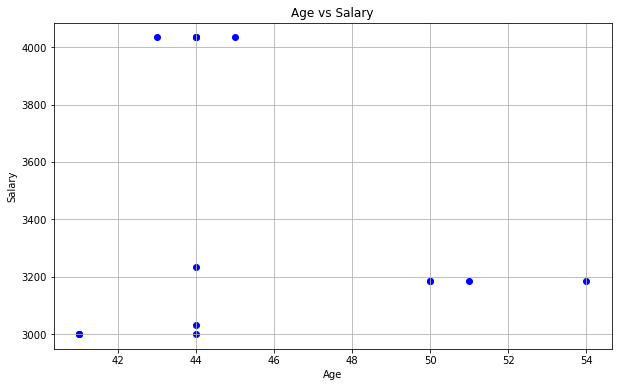

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Age'], filtered_data['Salary'], color='blue')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


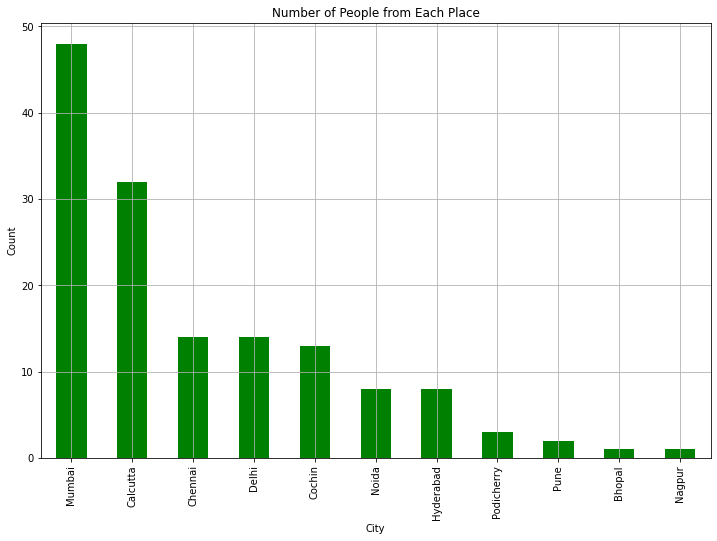

In [8]:
place_counts = data_filled['City'].value_counts()
plt.figure(figsize=(12, 8))
place_counts.plot(kind='bar', color='green')
plt.title('Number of People from Each Place')
plt.xlabel('City')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [10]:
label_encoder = LabelEncoder()
data_filled['Gender (0=Male, 1=Female)'] = label_encoder.fit_transform(data_filled['Gender (0=Male, 1=Female)'])
data_filled.head()

KeyError: 'Gender (0=Male, 1=Female)'

In [11]:

data_encoded = pd.get_dummies(data_filled, columns=['Company', 'City'])

data_encoded.head()


,Age,Salary,Country,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,...,City_Calcutta,City_Chennai,City_Cochin,City_Delhi,City_Hyderabad,City_Mumbai,City_Nagpur,City_Noida,City_Podicherry,City_Pune
0,20.0,5000.0,India,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,30.0,5000.0,India,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,35.0,2300.0,India,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,40.0,3000.0,India,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,23.0,4000.0,India,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler = StandardScaler()

data_standard_scaled = data_encoded.copy()
data_standard_scaled[data_encoded.columns] = standard_scaler.fit_transform(data_encoded[data_encoded.columns])
data_standard_scaled.head()
minmax_scaler = MinMaxScaler()

data_minmax_scaled = data_encoded.copy()
data_minmax_scaled[data_encoded.columns] = minmax_scaler.fit_transform(data_encoded[df_encoded.columns])

data_minmax_scaled.head()


ValueError: could not convert string to float: 'India'

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()

data_standard_scaled = data_encoded.copy()
data_standard_scaled[data_encoded.columns] = standard_scaler.fit_transform(data_encoded[data_encoded.columns])

data_standard_scaled.head()



ValueError: could not convert string to float: 'India'

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()

data_standard_scaled = data_encoded.copy()
data_standard_scaled[data_encoded.columns] = standard_scaler.fit_transform(data_encoded[data_encoded.columns])

data_standard_scaled.head()

minmax_scaler = MinMaxScaler()

data_minmax_scaled = data_encoded.copy()
data_minmax_scaled[df_encoded.columns] = minmax_scaler.fit_transform(data_encoded[data_encoded.columns])

data_minmax_scaled.head()


ValueError: could not convert string to float: 'India'

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [16]:

standard_scaler = StandardScaler()

data_standard_scaled import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler= data_encoded.copy()
data_standard_scaled[data_encoded.columns] = standard_scaler.fit_transform(data_encoded[data_encoded.columns])

print(data_standard_scaled.head())


ValueError: could not convert string to float: 'India'

In [17]:

minmax_scaler = MinMaxScaler()

data_minmax_scaled = data_encoded.copy()
data_minmax_scaled[data_encoded.columns] = minmax_scaler.fit_transform(data_encoded[data_encoded.columns])

print(data_minmax_scaled.head())


ValueError: could not convert string to float: 'India'

In [18]:
data_minmax_scaled = data_encoded.copy()
data_minmax_scaled[data_encoded.columns] = minmax_scaler.fit_transform(data_encoded[data_encoded.columns])
print(data_minmax_scaled.head())


ValueError: could not convert string to float: 'India'